In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Import data (Make sure to parse dates. Consider setting index column to 'date'.)
df=pd.read_csv('page_view_time_series.csv',
               index_col="date",
              parse_dates=True)

In [4]:

actual = int(df.count(numeric_only=True))

In [5]:
actual

1304

In [6]:
# Clean data
df=df[(df['value']>=df['value'].quantile(0.025))&(df['value']<=df['value'].quantile(0.975))]



In [7]:
actual = int(df.count(numeric_only=True))

In [8]:
actual

1238

In [9]:
df.count()

value    1238
dtype: int64

Text(0, 0.5, 'Page Views')

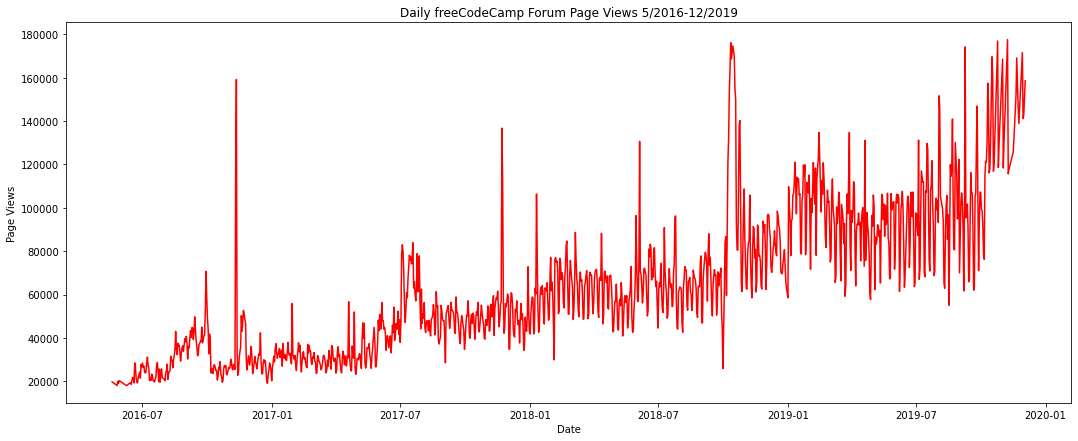

In [10]:
fig, axes= plt.subplots(figsize=(18,7))
plt.plot(df,color='red')
plt.title("Daily freeCodeCamp Forum Page Views 5/2016-12/2019")
plt.xlabel('Date')
plt.ylabel('Page Views')

In [11]:
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter

In [12]:
df.index = pd.to_datetime(df.index,format="%Y-%m-%d")

In [13]:
df_new=pd.DataFrame(df)

In [14]:
df_new

,value
date,
2016-05-19,19736
2016-05-26,18060
2016-05-27,19997
2016-05-28,19044
2016-05-29,20325
...,...
2019-11-24,138875
2019-11-29,171584
2019-11-30,141161


In [15]:
df_new.reset_index(level="date")

,date,value
0,2016-05-19,19736
1,2016-05-26,18060
2,2016-05-27,19997
3,2016-05-28,19044
4,2016-05-29,20325
...,...,...
1233,2019-11-24,138875
1234,2019-11-29,171584
1235,2019-11-30,141161
1236,2019-12-01,142918


In [16]:
df_copy = pd.DataFrame(df)
df_copy['year'] = df_copy.index.year
df_copy['Month'] = df_copy.index.month
df_complete = df_copy.groupby(['year', 'Month'])
df_complete=df_complete.mean()
df_complete=df_complete.unstack()

    


In [17]:
months=['January','February','March','April','May','June','July','August','September','October','November','December']

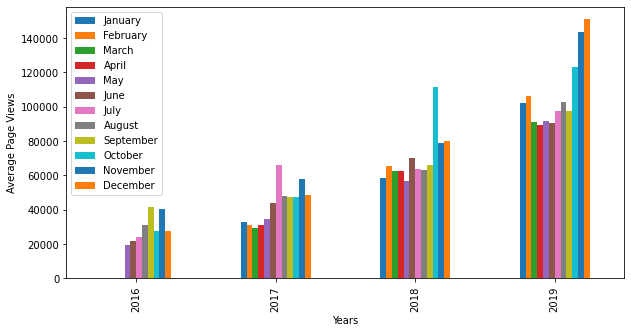

In [18]:
# Copy and modify data for monthly bar plot
figure=df_complete.plot(kind ="bar",  figsize = (10,5)).figure
plt.xlabel("Years")
plt.ylabel("Average Page Views")
plt.legend(fontsize = 10, labels = months)
plt.show()

In [19]:
df_copy

,value,year,Month
date,,,
2016-05-19,19736,2016,5
2016-05-26,18060,2016,5
2016-05-27,19997,2016,5
2016-05-28,19044,2016,5
2016-05-29,20325,2016,5
...,...,...,...
2019-11-24,138875,2019,11
2019-11-29,171584,2019,11
2019-11-30,141161,2019,11


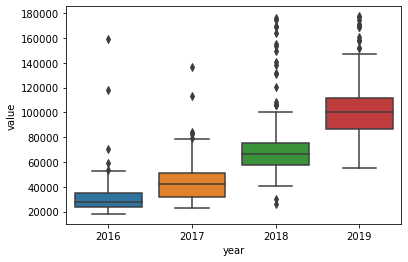

In [20]:
sns.boxplot(x='year',y='value', data=df_copy)

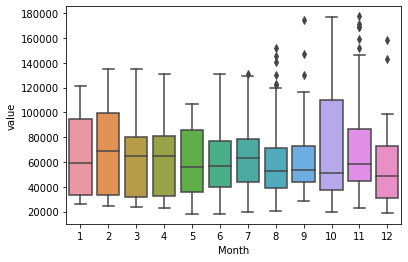

In [21]:
sns.boxplot(x='Month',y='value', data=df_copy)

In [22]:
df_box = df.copy()
df_box.reset_index(inplace=True)
df_box['year'] = [d.year for d in df_box.date]
df_box['month'] = [d.strftime('%b') for d in df_box.date]

In [23]:
df_box.sort_values(by=['year','date'],ascending=[False,True],inplace=True)

Text(0.5, 1.0, 'Month-wise Box Plot (Seasonality)')

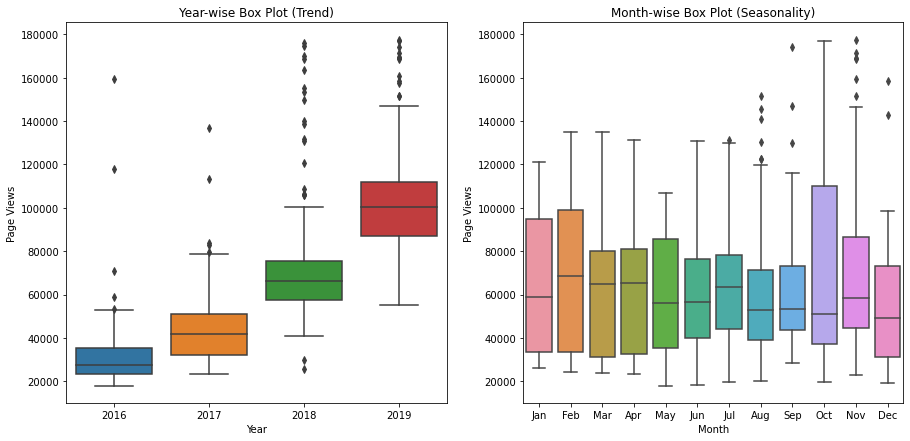

In [24]:


fig, (ax_year1, ax_month1) = plt.subplots(1, 2)
fig.set_figwidth(15)
fig.set_figheight(7)



ax_year1 = sns.boxplot(x=df_box.year, y=df_box.value, ax=ax_year1)
ax_year1.set_xlabel('Year')
ax_year1.set_ylabel('Page Views')
ax_year1.set_title("Year-wise Box Plot (Trend)")

ax_month1 = sns.boxplot(x="month", y="value", data=df_box, ax=ax_month1)
ax_month1.set_xlabel('Month')
ax_month1.set_ylabel('Page Views')
ax_month1.set_title("Month-wise Box Plot (Seasonality)")
